In [23]:
import torch
import torch.nn as nn
import numpy as np
from PIL import Image
from CustomCNN import CNNModel
import torchvision.transforms as transforms
import cv2

In [3]:
IMAGE_SIZE = 180
image_tensor=transforms.Compose([
        transforms.RandomRotation(30),  # Randomly rotate images in the range (degrees, 0 to 180)
        transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally
        transforms.RandomVerticalFlip(),  # Randomly flip images vertically
        transforms.Resize(size=(IMAGE_SIZE, IMAGE_SIZE)), #resize image
        #transforms.RandomResizedCrop(size=(new_size, new_size)),  # Randomly crop and resize images
        transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4),  # Randomly adjust brightness, contrast, and saturation
        transforms.ToTensor(),  # Convert the image to a PyTorch tensor
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the image
    ])
    #image is the result of Image.open(file)
    
    
    #transformed_image = image_tensor(image)

In [27]:
model = CNNModel(num_classes=2)

# Load the trained parameters into the model
model.load_state_dict(torch.load('trained_model_32_resize_moreTransformations_acc82.pth'))
model.eval()  # Set the model to evaluation mode
    
print("Model Successfully Loaded!")

Model Successfully Loaded!


In [28]:
model

CNNModel(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=129600, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
)

In [29]:
#img = Image.open("uploaded_images/person16_virus_47.jpeg")
img = cv2.imread("uploaded_images/IM-0003-0001.jpeg")
img_resized = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
img_rgb = Image.fromarray(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
transformed_image = image_tensor(img_rgb)

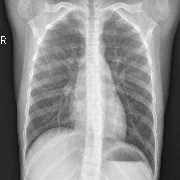

In [30]:
display(img_rgb)

In [31]:
transformed_image = transformed_image[np.newaxis, :]

In [32]:
transformed_image.size()

torch.Size([1, 3, 180, 180])

In [33]:
prob = model(transformed_image)

In [34]:
prob

tensor([[ 1.1378, -1.3890]], grad_fn=<AddmmBackward0>)

In [41]:
softmax = nn.Softmax(dim=1)
softmax_outputs = softmax(prob)
print(softmax_outputs)
_, predicted = torch.max(softmax_outputs, 1)
print(softmax_outputs.squeeze(0)[torch.argmax(softmax_outputs)].item())

tensor([[0.9260, 0.0740]], grad_fn=<SoftmaxBackward0>)
0.9260001182556152


In [43]:
predicted.item()

0